In [5]:
from yamlParseObjects.yamlObjects import * 
from yamlParseObjects.variablesUtil import *
import logging
import os,sys
import subprocess
import platform
import shutil
import numpy as np 
import matplotlib.pyplot as plt 
from enum import Enum
from sklearn import svm

simConfig = simulationConfig('./assets/yamlFiles/adaptiveTesting.yaml')
for p in simConfig.codeBase: 
    sys.path.insert(0,p)
    print(p + ' is added to the path')

from geneticalgorithm import geneticalgorithm as ga
from ActiveLearning.benchmarks import Branin, Hosaki
from ActiveLearning.Sampling import *
from ActiveLearning.optimizationHelper import GeneticAlgorithmSolver as gaSolver

from ActiveLearning.visualization import * 

import time
import numpy as np 

/home/caps/Auto_RTDS_Deployment/ver13d is added to the path


In [7]:
variablesFiles = './assets/yamlFiles/varAdaptTest.yaml'
variables = getAllVariableConfigs(yamlFileAddress=variablesFiles, scalingScheme=Scale.LINEAR)
budget = simConfig.sampleBudget # Number of sampels:
initialSampleSize = simConfig.initialSampleSize
batchSize = simConfig.batchSize

In [8]:
mySpace = Space(variableList = variables,initialSampleCount = initialSampleSize)
currentBudget = budget - initialSampleSize

# myBench = DistanceFromOrigin(threshold = 3, inputDim = 2, center = [5,5])
myBench = Hosaki()
# myBench = Branin(25)
mySpace.generateInitialSample()
mySpace.getBenchmarkLabels(myBench)

NameError: name 'Hosaki' is not defined

In [4]:
mySpace.fit_classifier()
figFolder = simConfig.figFolder
sInfo = SaveInformation(fileName=f'{figFolder}/Initial_labeling', savePDF=False, savePNG=True)

In [5]:
acc = [mySpace.getAccuracyMeasure(percent = True)]

In [6]:
acc

[74.28]

In [7]:
epsilon = 0.05
def objFunction(X):
    dist = mySpace.nearestPointDistance(X)
    pen = 0
    df = mySpace.clf.decision_function(X.reshape(1,len(X)))
    if abs(df) > epsilon:
        pen = abs(df) * 100
    return -1 * dist + pen


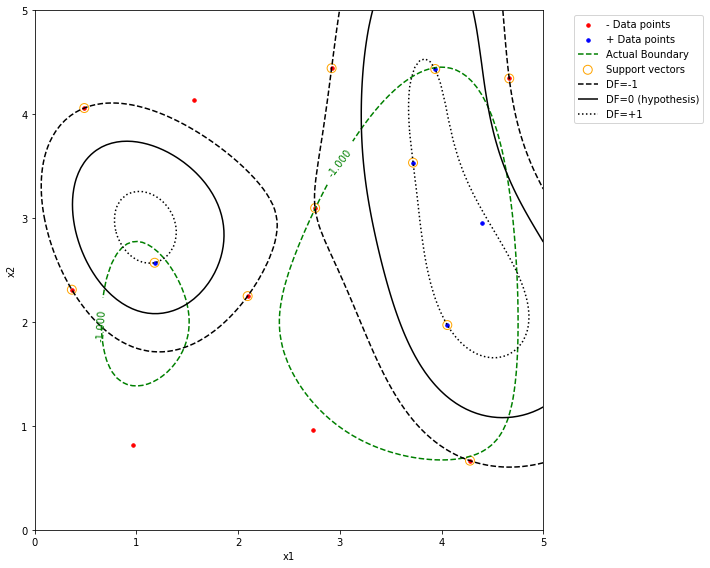

In [8]:
plotSpace(mySpace,figsize = (10,8), legend = True, saveInfo=sInfo, showPlot=True)

Hypothesis change estimate:  27.400000000000002 %
 The best solution found:
 [1.8315237  3.10677164]

 Objective function:
 -0.8438345128889398
 The best solution found:
 [4.94858895 1.15265914]

 Objective function:
 -0.8279203893485071
 The best solution found:
 [0.38519794 3.17878397]

 Objective function:
 -0.8675297555243717


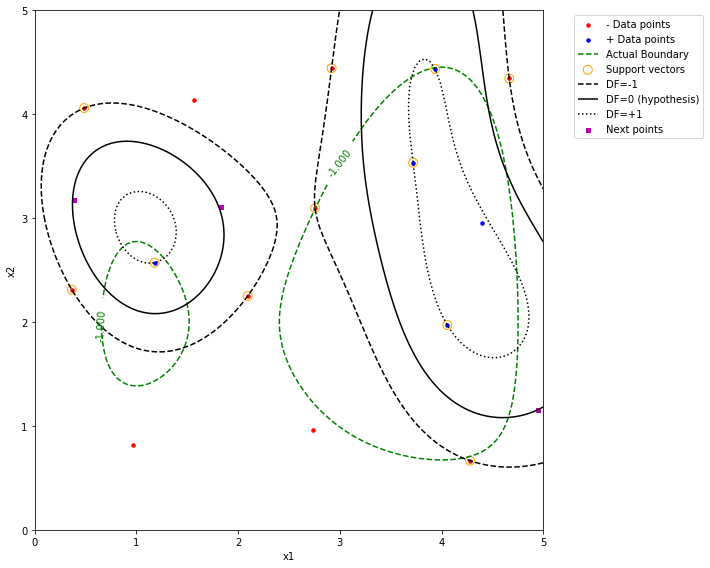

Hypothesis change estimate:  [7.3999999999999995] %
Current Accuracy estimate:  [78.8] %


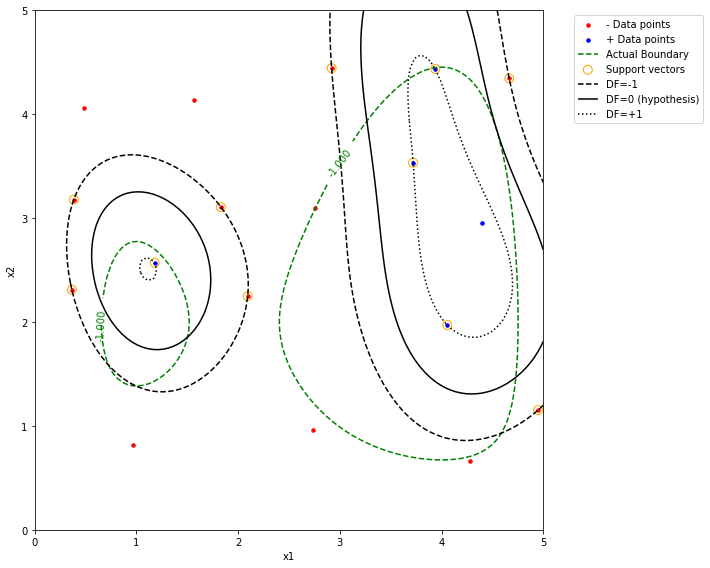

 The best solution found:
 [3.4428138 2.5750017]

 Objective function:
 -0.8609830363081928
 The best solution found:
 [1.00084914 1.79440496]

 Objective function:
 -0.7967046186209551
 The best solution found:
 [1.07882323 3.26041808]

 Objective function:
 -0.6970204570798659


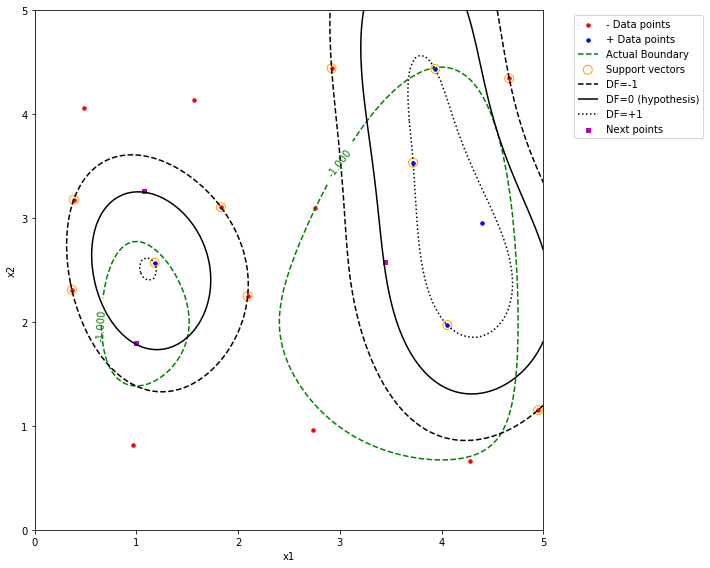

Hypothesis change estimate:  [7.28] %
Current Accuracy estimate:  [80.80000000000001] %


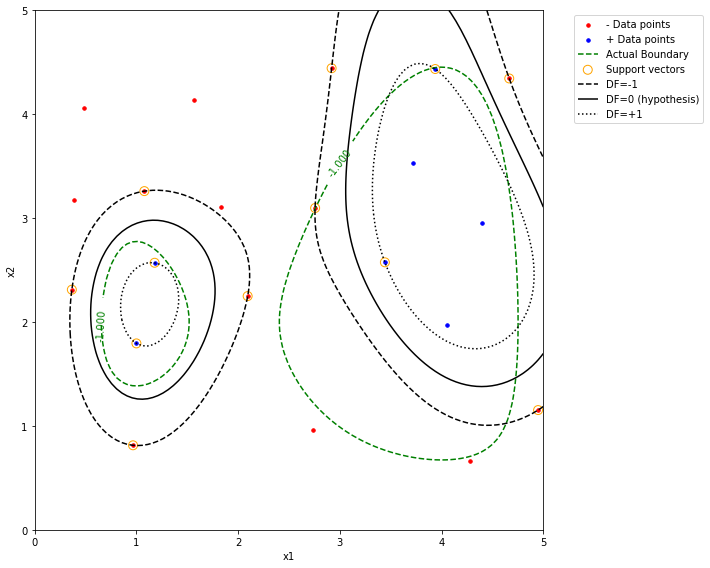

 The best solution found:
 [3.35958446 4.94676007]

 Objective function:
 -0.6686010226060425
 The best solution found:
 [3.07712752 3.68081152]

 Objective function:
 -0.6588770553915329
 The best solution found:
 [1.65218097 1.76451598]

 Objective function:
 -0.6520172635156232


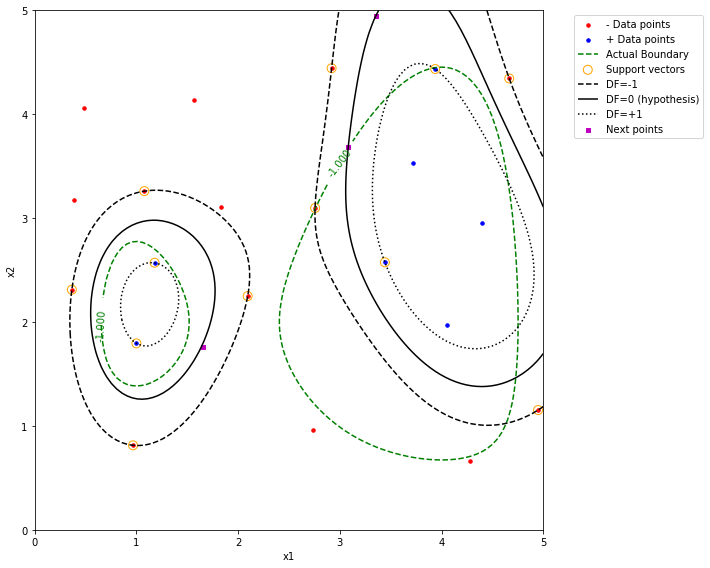

Hypothesis change estimate:  [5.52] %
Current Accuracy estimate:  [81.28] %


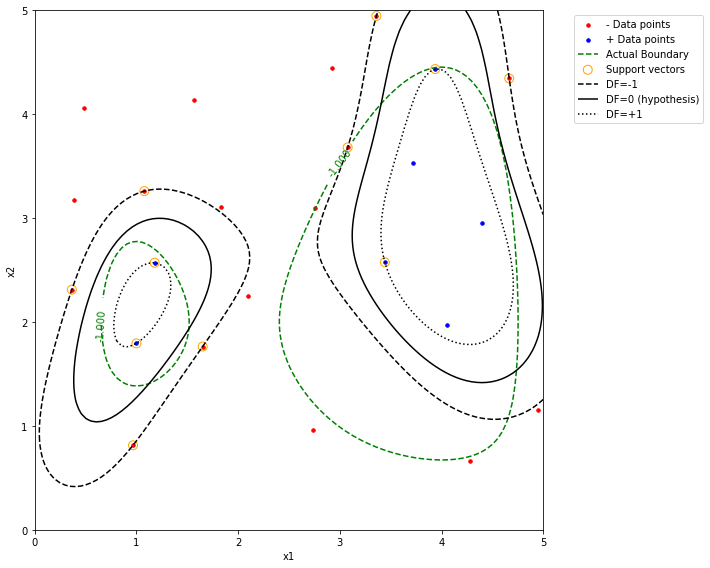

 The best solution found:
 [4.99130856 2.09189132]

 Objective function:
 -0.940203193472514
 The best solution found:
 [4.61755523 3.61785786]

 Objective function:
 -0.6953314958110289
 The best solution found:
 [0.37605003 1.40631758]

 Objective function:
 -0.7355173328043536


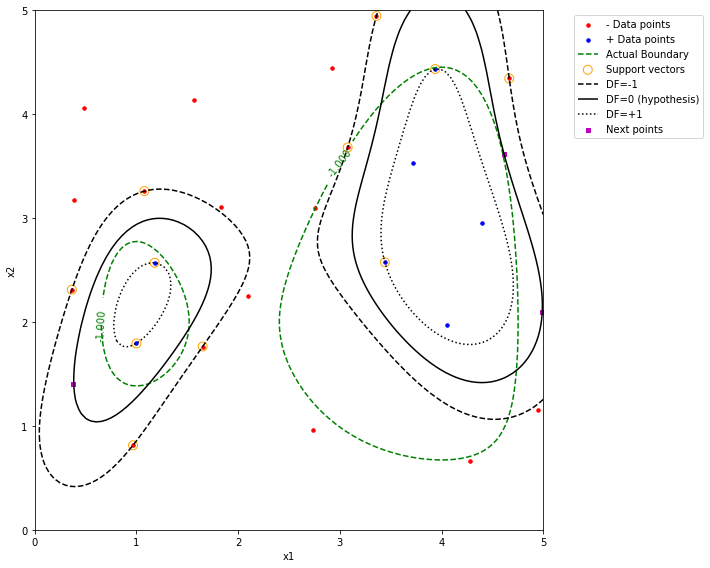

Hypothesis change estimate:  [4.2] %
Current Accuracy estimate:  [81.08] %


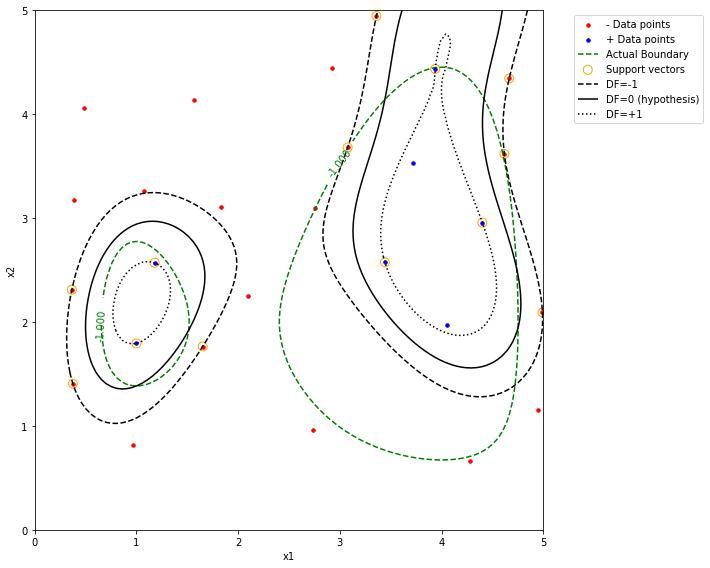

 The best solution found:
 [4.54314038 1.63150026]

 Objective function:
 -0.5934617567688457
 The best solution found:
 [4.58976903 4.99706132]

 Objective function:
 -0.6566304034384667
 The best solution found:
 [3.51061996 2.01557249]

 Objective function:
 -0.5475556665284627


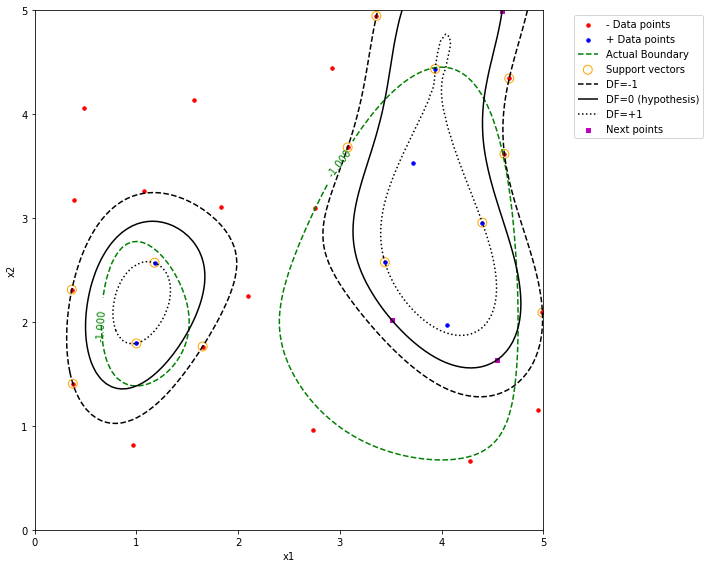

Hypothesis change estimate:  [3.7600000000000002] %
Current Accuracy estimate:  [83.88] %


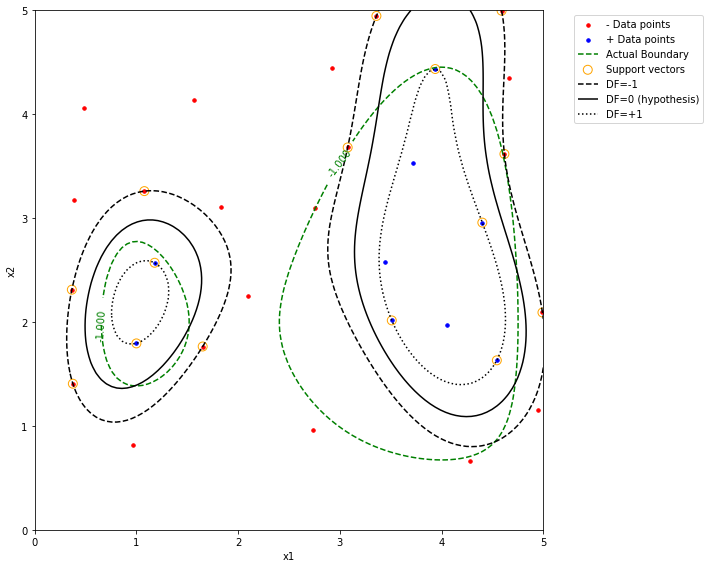

 The best solution found:
 [3.83076752 1.25436833]

 Objective function:
 -0.7401234601955565
 The best solution found:
 [3.40497731 4.15097538]

 Objective function:
 -0.566942447777814
 The best solution found:
 [4.44281224 1.13506556]

 Objective function:
 -0.497247867682058


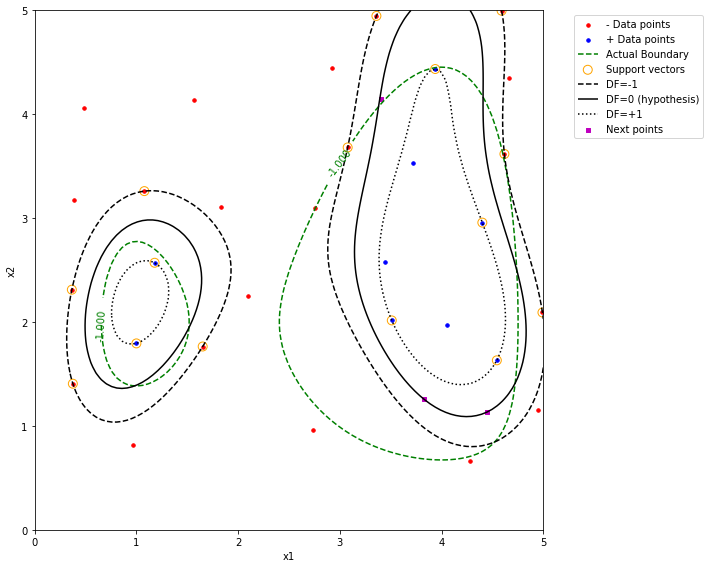

Hypothesis change estimate:  [4.04] %
Current Accuracy estimate:  [85.04] %


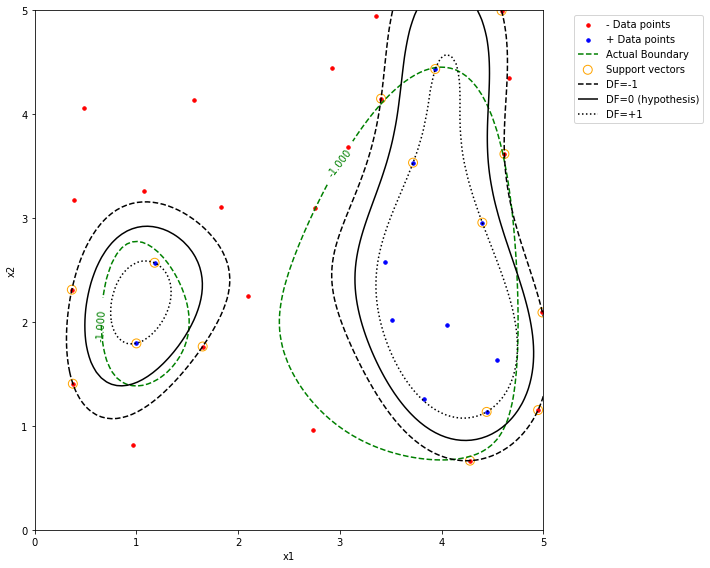

 The best solution found:
 [3.34212314 3.18706147]

 Objective function:
 -0.5128315301289186
 The best solution found:
 [1.63005951 2.47021645]

 Objective function:
 -0.46134302705853936
 The best solution found:
 [4.70383817 2.56849492]

 Objective function:
 -0.49310563528384993


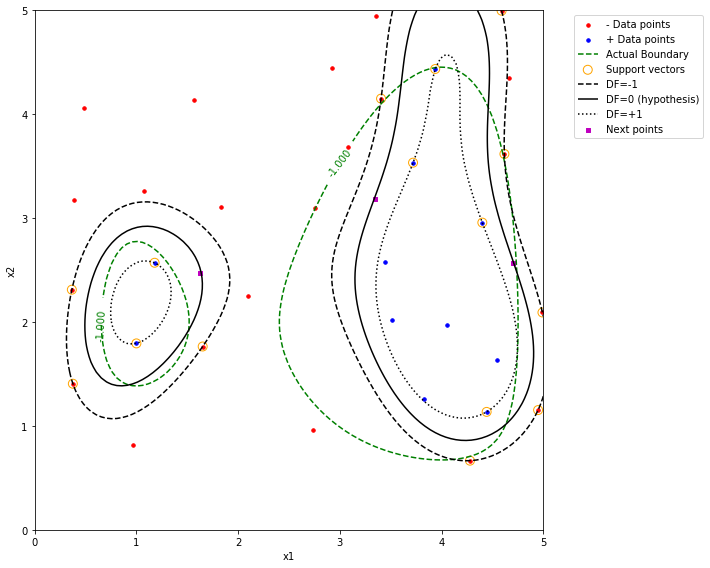

Hypothesis change estimate:  [5.08] %
Current Accuracy estimate:  [86.84] %


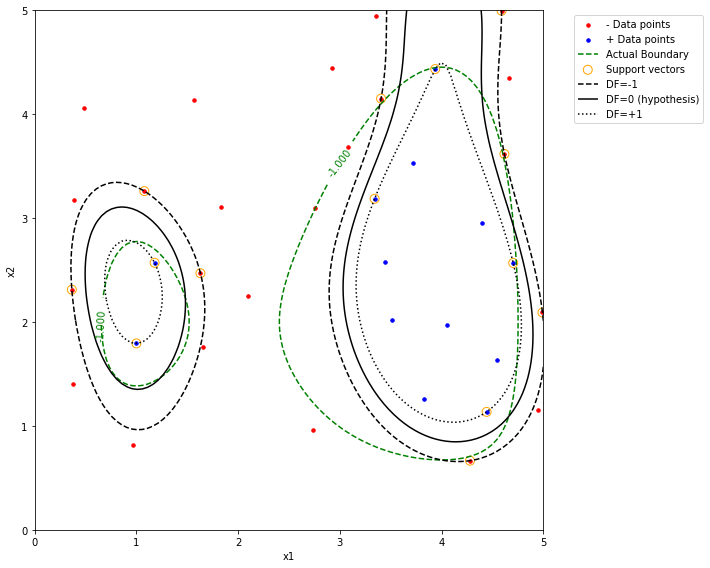

 The best solution found:
 [3.28871934 1.40109849]

 Objective function:
 -0.5615567277164318
 The best solution found:
 [3.04266131 2.1212284 ]

 Objective function:
 -0.4797379158138468
 The best solution found:
 [1.18633719 1.40059385]

 Objective function:
 -0.43530794673424783


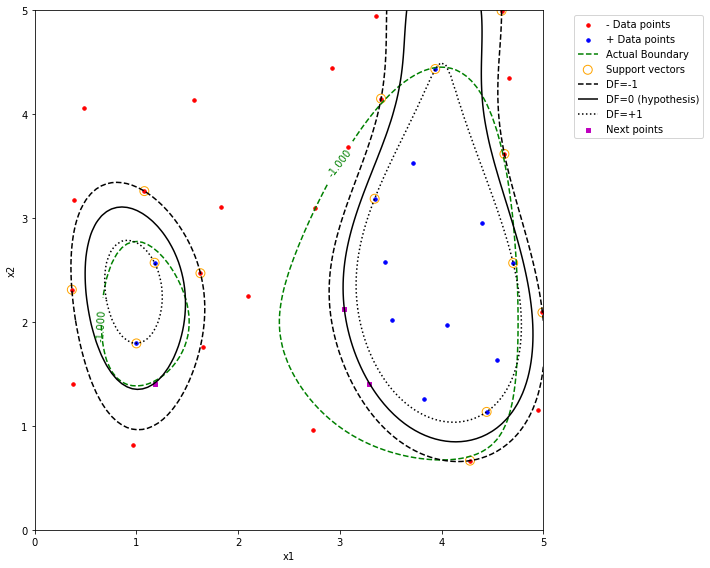

Hypothesis change estimate:  [2.48] %
Current Accuracy estimate:  [87.88] %


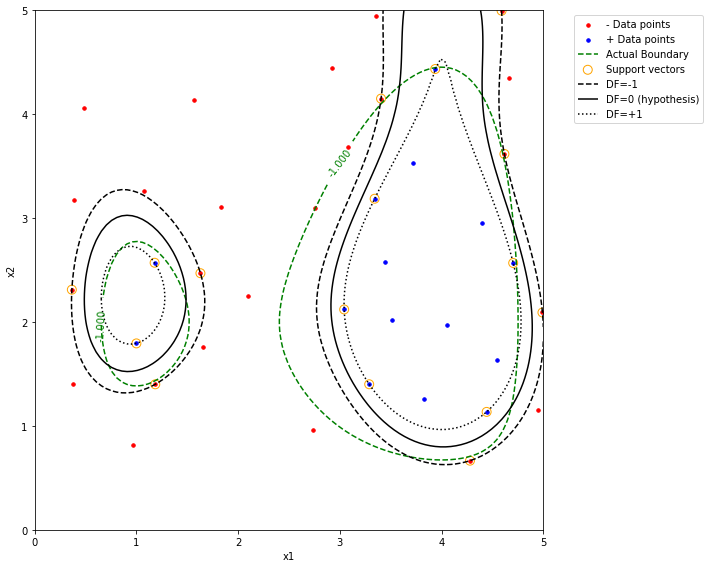

 The best solution found:
 [2.98758457 2.63621781]

 Objective function:
 -0.45932674766235726
 The best solution found:
 [0.54698467 1.85212149]

 Objective function:
 -0.45751956379270153
 The best solution found:
 [3.52167486 0.96365904]

 Objective function:
 -0.4243231837635701


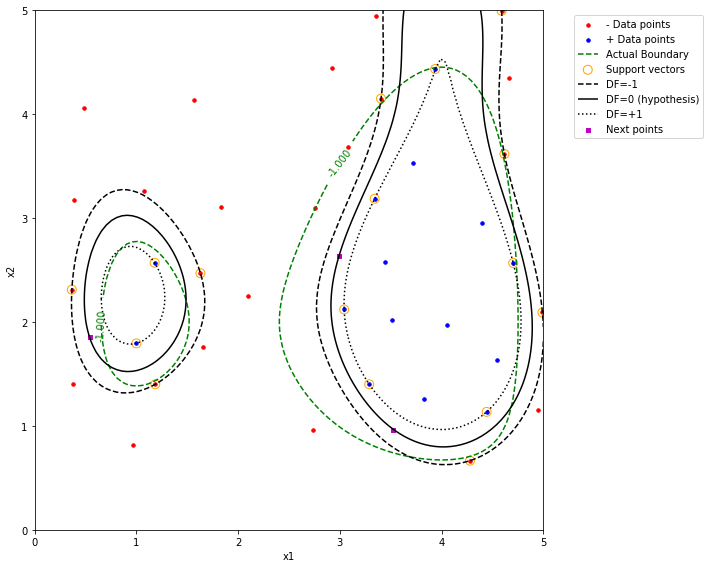

Hypothesis change estimate:  [2.92] %
Current Accuracy estimate:  [89.75999999999999] %


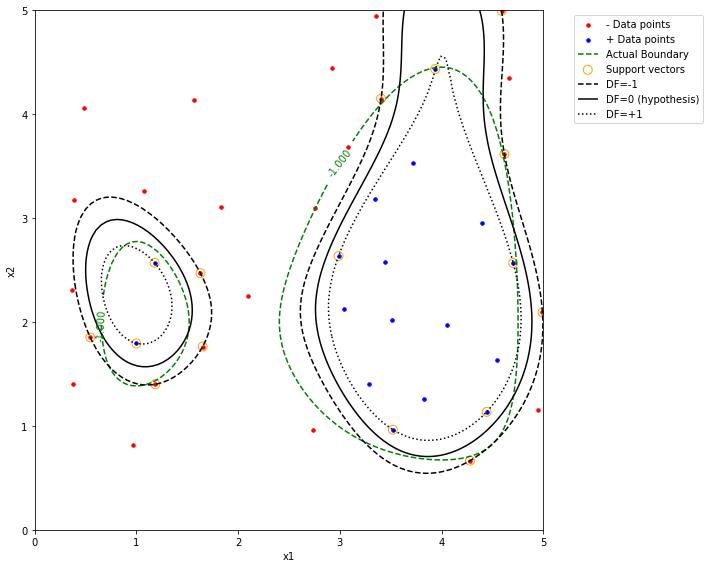

 The best solution found:
 [0.53929415 2.75470495]

 Objective function:
 -0.45120799955715585
 The best solution found:
 [2.87427386 1.62818348]

 Objective function:
 -0.47258084445908277
 The best solution found:
 [3.59932922 4.61432214]

 Objective function:
 -0.38241211475122305


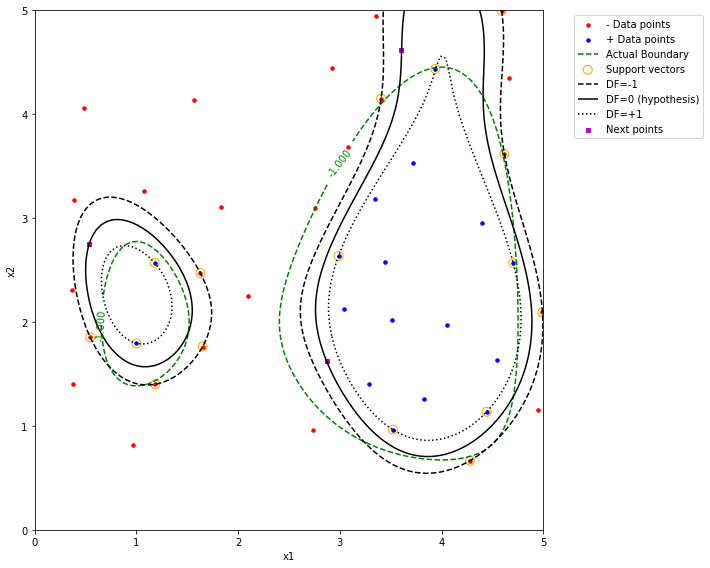

Hypothesis change estimate:  [3.56] %
Current Accuracy estimate:  [92.36] %


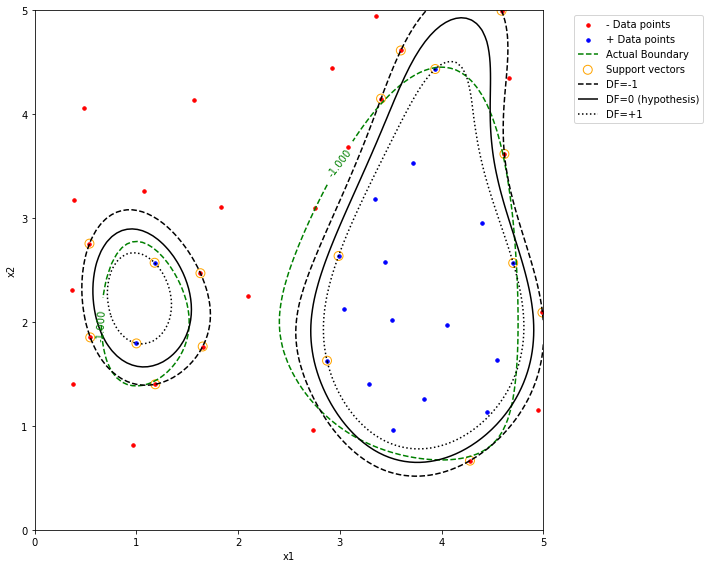

 The best solution found:
 [4.14993456 4.92784578]

 Objective function:
 -0.4452472947151791
 The best solution found:
 [2.71585206 1.96150192]

 Objective function:
 -0.3637538205238328
 The best solution found:
 [3.80481893 0.64804724]

 Objective function:
 -0.42400633817124733


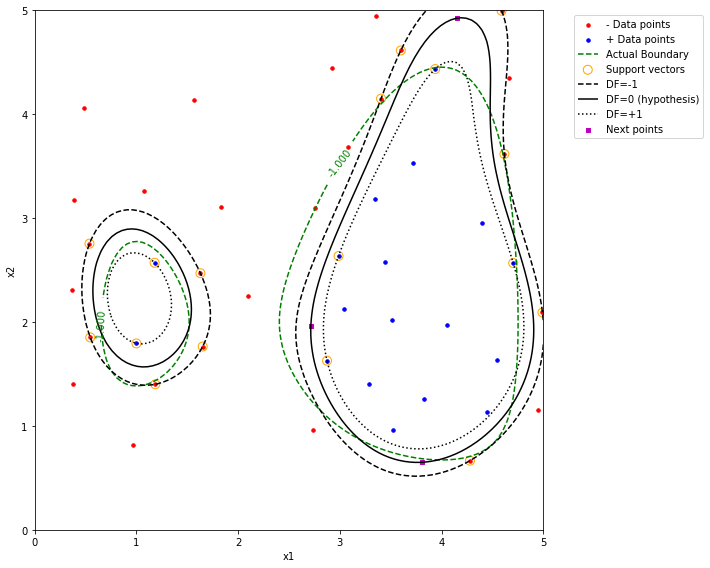

Hypothesis change estimate:  [2.16] %
Current Accuracy estimate:  [93.56] %


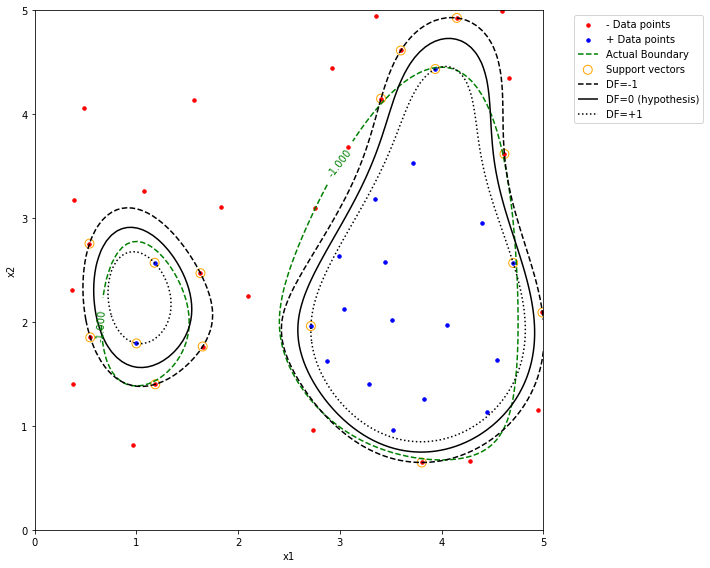

 The best solution found:
 [1.04492139 2.89647969]

 Objective function:
 -0.3525511829829419
 The best solution found:
 [4.47924345 3.99529584]

 Objective function:
 -0.3958020095690391
 The best solution found:
 [2.70729744 2.37600856]

 Objective function:
 -0.38245225909948327


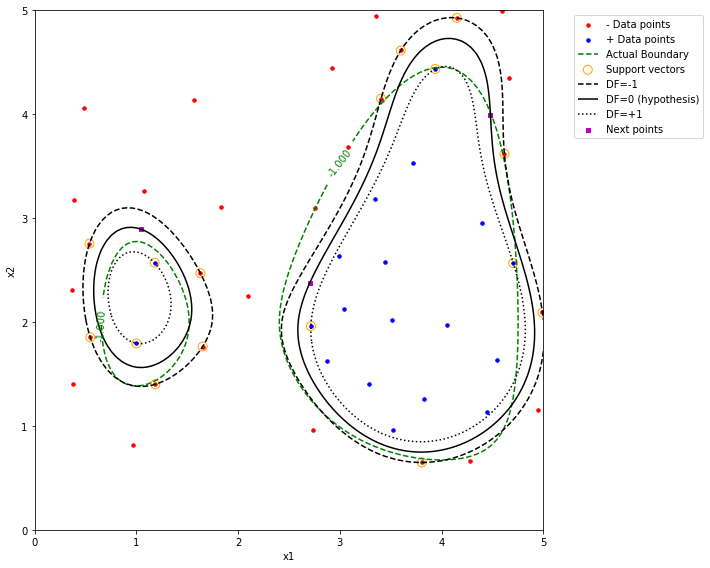

Hypothesis change estimate:  [3.7199999999999998] %
Current Accuracy estimate:  [93.76] %


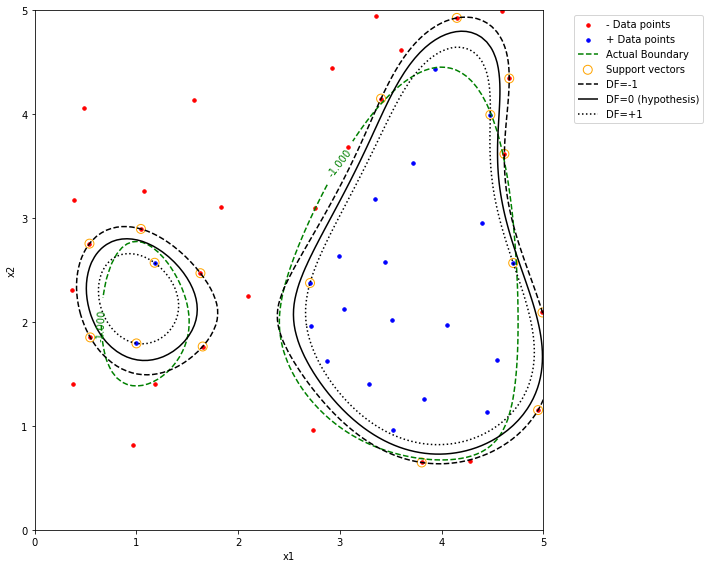

In [9]:
optimizer = gaSolver(space = mySpace, 
                     epsilon = epsilon, 
                     batchSize = batchSize, 
                     convergence_curve = False, 
                     progress_bar = False)
changeMeasure = [mySpace.getChangeMeasure(percent = True, updateConvLabels=True)]
print('Hypothesis change estimate: ', changeMeasure[0] , '%')
sampleNumbers = [len(mySpace.samples)]
while currentBudget > 0:
    newPointsFound = optimizer.findNextPoints(min(currentBudget, batchSize))
    currentBudget -= min(currentBudget, batchSize)
    sInfo.fileName = f'{figFolder}/bdgt_{currentBudget}_NotLabeled'
    plotSpace(mySpace,figsize = (10,8), legend = True, newPoint = newPointsFound, saveInfo=sInfo, showPlot=True)
    mySpace.addPointsToSampleList(newPointsFound)
    mySpace.getBenchmarkLabels()
    mySpace.fit_classifier()
    changeMeasure.append(mySpace.getChangeMeasure(percent = True, updateConvLabels=True))
    acc.append(mySpace.getAccuracyMeasure(percent = True))
    print('Hypothesis change estimate: ', changeMeasure[-1:], '%')
    print('Current Accuracy estimate: ',acc[-1:],'%')
    sampleNumbers.append(len(mySpace.samples))
    sInfo.fileName = f'{figFolder}/bdgt_{currentBudget}_Labeled'
    plotSpace(mySpace,figsize = (10,8), legend = True, newPoint = None, saveInfo=sInfo, showPlot=True)

Text(0, 0.5, 'Hypothesis change %')

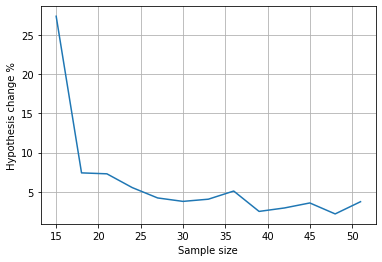

In [12]:
plt.plot(sampleNumbers, changeMeasure)
plt.grid(True)
plt.xlabel('Sample size')
plt.ylabel('Hypothesis change %')

Text(0, 0.5, 'Hypothesis Accuracy %')

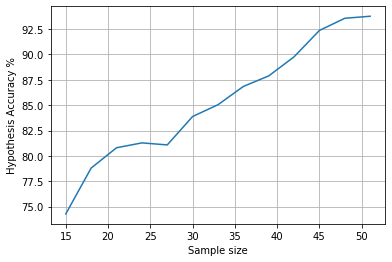

In [13]:
plt.plot(sampleNumbers, acc)
plt.grid(True)
plt.xlabel('Sample size')
plt.ylabel('Hypothesis Accuracy %')
